In [3]:
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import datetime
from dateutil import parser
import matplotlib.dates as mdates
import matplotlib.ticker as plticker
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('/Users/salonikhanna/Desktop/FINAL PROJECT/LTC_USD_2018-06-01_2021-08-02-CoinDesk.csv',index_col=0)
print(df.head())
print('')
print(df.shape) 
print('') 

               Price
Date                
01/06/18  117.475053
02/06/18  119.934676
03/06/18  123.222694
04/06/18  125.365456
05/06/18  119.522003

(1158, 1)



In [5]:
df.columns

Index(['Price'], dtype='object')

In [6]:
print(df.Price.head())
print('') 
print(df.Price.shape)  
print('')

Date
01/06/18    117.475053
02/06/18    119.934676
03/06/18    123.222694
04/06/18    125.365456
05/06/18    119.522003
Name: Price, dtype: float64

(1158,)



In [7]:
### split dataset into train and test sets 
prediction_days = 50 
df_train = df.Price[:len(df.Price) - prediction_days]
df_test = df.Price[len(df.Price) - prediction_days:]

print(df_train.head())
print('')
print(df_train.shape)
print('')
print(df_test.head())
print('')
print(df_test.shape)
print('')

Date
01/06/18    117.475053
02/06/18    119.934676
03/06/18    123.222694
04/06/18    125.365456
05/06/18    119.522003
Name: Price, dtype: float64

(1108,)

Date
14/06/21    171.320528
15/06/21    175.140246
16/06/21    175.636559
17/06/21    167.062087
18/06/21    165.018225
Name: Price, dtype: float64

(50,)



In [8]:
### preprocess the data by reshaping it 
training_set = df_train.values 
training_set = np.reshape(training_set, (len(training_set),1))

print("Training set after reshaping:")
print('')
print(training_set)
print('')
print(training_set.shape)
print('')

Training set after reshaping:

[[117.4750534]
 [119.9346763]
 [123.2226936]
 ...
 [168.5589071]
 [162.9725567]
 [162.3359998]]

(1108, 1)



In [9]:
### preprocess the data by scaling it 
sc = MinMaxScaler() 
training_set = sc.fit_transform(training_set) 
X_train = training_set[0 : len(training_set) -1]
y_train = training_set[1 : len(training_set)]
X_train = np.reshape(X_train, (len(X_train),1, 1)) 
                       
print("Scaled training set:")
print('')
print(training_set)
print('')
print("Define X_train")
print('')
print(X_train)
print('')
print(X_train.shape)
print("Define y_train:")
print('')
print(y_train)
print('')
print(y_train.shape)
print('')
print("X_train reshaped:")
print('')
print(X_train) 
print('') 
print(X_train.shape)
print('')

Scaled training set:

[[0.262713  ]
 [0.26954282]
 [0.27867291]
 ...
 [0.4045614 ]
 [0.38904936]
 [0.38728178]]

Define X_train

[[[0.262713  ]]

 [[0.26954282]]

 [[0.27867291]]

 ...

 [[0.41270038]]

 [[0.4045614 ]]

 [[0.38904936]]]

(1107, 1, 1)
Define y_train:

[[0.26954282]
 [0.27867291]
 [0.28462288]
 ...
 [0.4045614 ]
 [0.38904936]
 [0.38728178]]

(1107, 1)

X_train reshaped:

[[[0.262713  ]]

 [[0.26954282]]

 [[0.27867291]]

 ...

 [[0.41270038]]

 [[0.4045614 ]]

 [[0.38904936]]]

(1107, 1, 1)



In [10]:
### define the RNN model 
### instantiate the RNN model object 
regr = Sequential() 

### add the input and LSTM layers 
regr.add(LSTM(units =4, activation ='sigmoid', input_shape =(None, 1)))    

### add the output layer
regr.add(Dense(units =1))

### compile the RNN 
regr.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy']) 

### fit the model on the training set 
regr.fit(X_train, y_train, batch_size =5, epochs =150)  


2021-10-28 14:10:56.564889: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-28 14:10:56.759403: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150
222/222 [==============================] - 2s 2ms/step - loss: 0.0403 - accuracy: 9.0334e-04
Epoch 2/150
222/222 [==============================] - 0s 2ms/step - loss: 0.0273 - accuracy: 9.0334e-04
Epoch 3/150
222/222 [==============================] - 1s 2ms/step - loss: 0.0254 - accuracy: 9.0334e-04
Epoch 4/150
222/222 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 9.0334e-04
Epoch 5/150
222/222 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 9.0334e-04
Epoch 6/150
222/222 [==============================] - 0s 2ms/step - loss: 0.0195 - accuracy: 9.0334e-04
Epoch 7/150
222/222 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 9.0334e-04
Epoch 8/150
222/222 [==============================] - 1s 2ms/step - loss: 0.0149 - accuracy: 9.0334e-04
Epoch 9/150
222/222 [==============================] - 1s 2ms/step - loss: 0.0124 - accuracy: 9.0334e-04
Epoch 10/150
222/222 [==============================] -

222/222 [==============================] - 0s 2ms/step - loss: 3.4430e-04 - accuracy: 0.0018
Epoch 79/150
222/222 [==============================] - 0s 2ms/step - loss: 3.4036e-04 - accuracy: 0.0018
Epoch 80/150
222/222 [==============================] - 0s 2ms/step - loss: 3.4285e-04 - accuracy: 0.0018
Epoch 81/150
222/222 [==============================] - 0s 2ms/step - loss: 3.4127e-04 - accuracy: 0.0018
Epoch 82/150
222/222 [==============================] - 0s 2ms/step - loss: 3.3879e-04 - accuracy: 0.0018
Epoch 83/150
222/222 [==============================] - 0s 2ms/step - loss: 3.4660e-04 - accuracy: 0.0018
Epoch 84/150
222/222 [==============================] - 0s 2ms/step - loss: 3.3803e-04 - accuracy: 0.0018
Epoch 85/150
222/222 [==============================] - 0s 2ms/step - loss: 3.3903e-04 - accuracy: 0.0018
Epoch 86/150
222/222 [==============================] - 0s 2ms/step - loss: 3.3499e-04 - accuracy: 0.0018
Epoch 87/150
222/222 [==============================] - 0s 

In [11]:
### create predictions on the test set 
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1)) 
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_LTC_price = regr.predict(inputs) 
predicted_LTC_price = sc.inverse_transform(predicted_LTC_price)

print("Test set after reshaping:")
print('')
print(inputs)
print('')
print(inputs.shape)
print('')
print("Scaled inputs:")
print('')
print(inputs) 
print('')
print("Reshaped inputs:")
print('')
print(inputs)
print('')
print(inputs.shape)
print('')
print("Predicted LTC price: ", predicted_LTC_price)
print('')
print("Scaled predicted LTC price: ", predicted_LTC_price)
print('')

Test set after reshaping:

[[[0.4122298 ]]

 [[0.4228363 ]]

 [[0.42421445]]

 [[0.40040507]]

 [[0.39472972]]

 [[0.3682639 ]]

 [[0.36381363]]

 [[0.36906893]]

 [[0.28867686]]

 [[0.26823833]]

 [[0.28986023]]

 [[0.3088448 ]]

 [[0.28622078]]

 [[0.28179967]]

 [[0.299992  ]]

 [[0.31874519]]

 [[0.33820446]]

 [[0.33552353]]

 [[0.31993914]]

 [[0.3116433 ]]

 [[0.32108427]]

 [[0.34303479]]

 [[0.32524906]]

 [[0.31996525]]

 [[0.32102498]]

 [[0.29807931]]

 [[0.31231622]]

 [[0.30745419]]

 [[0.310024  ]]

 [[0.30655355]]

 [[0.29921734]]

 [[0.30229392]]

 [[0.28538839]]

 [[0.27677589]]

 [[0.27098113]]

 [[0.26517346]]

 [[0.25409834]]

 [[0.23438153]]

 [[0.26169709]]

 [[0.26948383]]

 [[0.27602492]]

 [[0.28260112]]

 [[0.28337318]]

 [[0.30098862]]

 [[0.3096306 ]]

 [[0.32767143]]

 [[0.32685772]]

 [[0.3370474 ]]

 [[0.34056056]]

 [[0.33335132]]]

(50, 1, 1)

Scaled inputs:

[[[0.4122298 ]]

 [[0.4228363 ]]

 [[0.42421445]]

 [[0.40040507]]

 [[0.39472972]]

 [[0.3682

In [12]:
### get evaluation of the model predictions 
model_evaluation = regr.evaluate(inputs, predicted_LTC_price) 

print("Model evaluation is: ", model_evaluation)  
print('') 

2/2 [==============================] - 0s 4ms/step - loss: 19322.4590 - accuracy: 0.0000e+00
Model evaluation is:  [19322.458984375, 0.0]



Visualize the results:



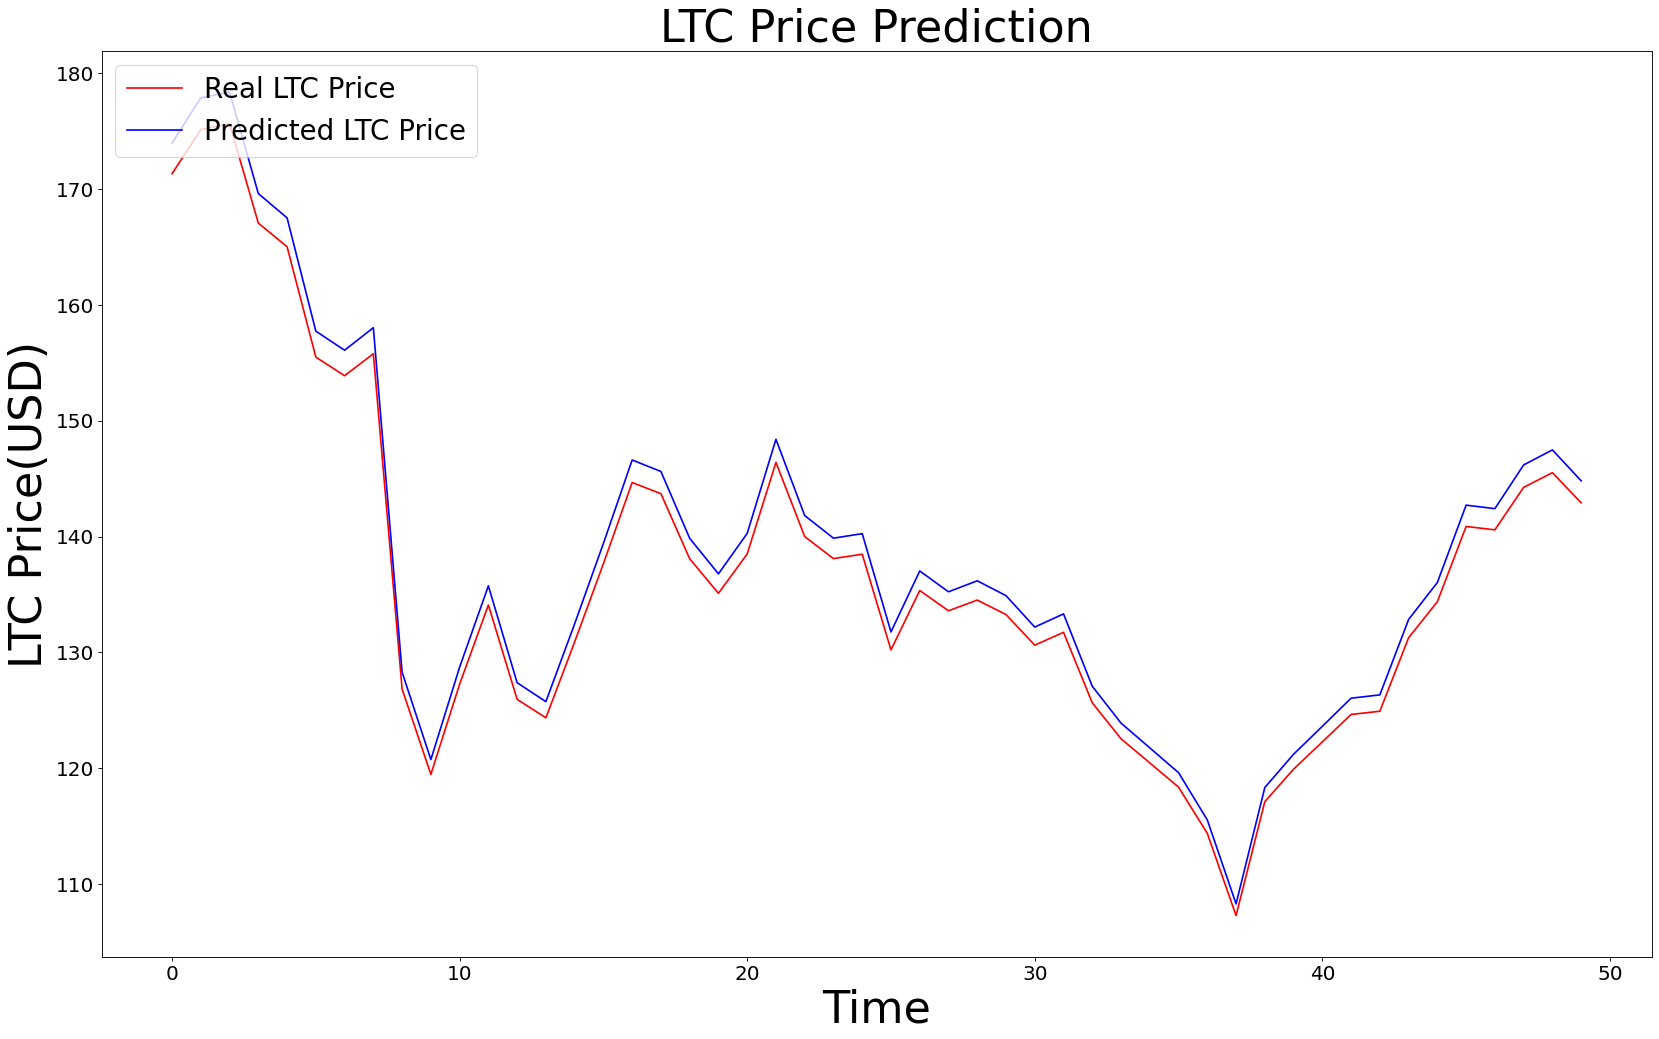

In [13]:
### visualize the results 
print("Visualize the results:") 
print('')

### plot the actual and predicted prices 
plt.figure(figsize =(25, 15), dpi =80, facecolor ='w', edgecolor ='k')
ax = plt.gca() 
plt.plot(test_set, color = 'red', label = "Real LTC Price") 
plt.plot(predicted_LTC_price, color = 'blue', label = "Predicted LTC Price") 
plt.title("LTC Price Prediction", fontsize = 40)

### reindex the 'df_test' dataframe 
df_test = df_test.reset_index() 
x = df_test.index

### set labels
labels = df_test['Date']

### set fontsize for 'x' and 'y' ticks 
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
    
### set plot labels 
plt.xlabel('Time', fontsize = 40)
plt.ylabel('LTC Price(USD)', fontsize = 40)

### set plot legend
plt.legend(loc = 2, prop = {'size' : 25})  

### show the plot 
plt.show()    

In [14]:
er4 = np.mean((predicted_LTC_price-test_set)**2)
print("Mean Square Error (MSE) using RNN:", er4)

Mean Square Error (MSE) using RNN: 486.3935689754378
